In [1]:
import nltk

In [3]:
import numpy as np
import pandas as pd

In [4]:
messages = [line.rstrip() for line in open('/content/SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [7]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [9]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
messages = pd.read_csv('/content/SMSSpamCollection', sep = '\t', names = ['label', 'message'])

In [11]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
messages['length'] = messages['message'].apply(len)

In [15]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
%matplotlib inline

<Axes: ylabel='Frequency'>

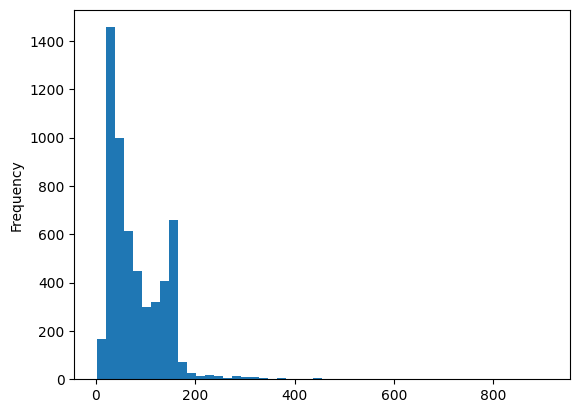

In [18]:
messages['length'].plot.hist(bins =50)

In [19]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [20]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

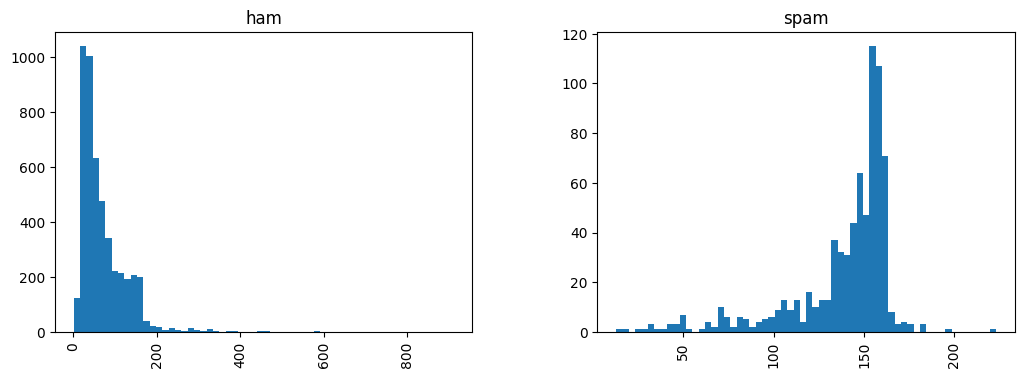

In [21]:
messages.hist(column = 'length', by= 'label', bins = 60, figsize= (12,4))

Observation: Spam msgs tend to have more msgs than ham!!!

Thus length can be a good parameter to differnetiate between spam and ham. :-)

Feature vectors will be needed for the classification.

In [22]:
import string

In [23]:
mess = 'Sample message! Notice: it has punctuation.'

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
nopunc = [c for c in mess if c not in string.punctuation]

In [26]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [31]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [32]:
from nltk.corpus import stopwords

In [33]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
nopunc = ''.join(nopunc)

In [35]:
nopunc

'Sample message Notice it has punctuation'

In [36]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [39]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [41]:
def text_process(mess):
  '''
  1. remove punctuation
  2. remove stop words
  3. return list of clean text words
  '''

  nopunc = [ char for char in mess if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  return  [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [42]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [43]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
### term frequency

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

Bag of word approach

In [49]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [50]:
print(len(new_transformer.vocabulary_))

11425


In [51]:
mess4 = messages['message'][3]

In [52]:
print(mess4)

U dun say so early hor... U c already then say...


In [53]:
bow4 = bow_transformer.transform([mess4])

In [54]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [55]:
print(bow4.shape)

(1, 11425)


In [58]:
messages_bow = bow_transformer.transform(messages['message'])

In [59]:
print('Shape of spare matrix: ', messages_bow.shape)

Shape of spare matrix:  (5572, 11425)


In [60]:
messages_bow.nnz

50548

In [61]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [62]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [63]:
from sklearn.feature_extraction.text import TfidfTransformer

In [64]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [66]:
tfidf4 = tfidf_transformer.transform(bow4)

In [67]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [69]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [70]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

Training and Classification using Naive Bayes Classifier

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [78]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [79]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [80]:
messages['label'][3]

'ham'

In [81]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [82]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

NOTE: We trained everything on our training data. This is not good for evaluation. Data should be split in test set and training set equally.

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)

In [87]:
msg_train

1038    naughty little thought: 'its better to flirt, ...
3769                               Where are you call me.
4222    Plz note: if anyone calling from a mobile Co. ...
5054                          Lmao you know me so well...
679                              Cause I'm not freaky lol
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
675        I've got  &lt;#&gt; , any way I could pick up?
3301                  Just do what ever is easier for you
4859                                                Ok...
3102                         Pathaya enketa maraikara pa'
Name: message, Length: 3900, dtype: object

In [88]:
from sklearn.pipeline import Pipeline

In [91]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [92]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ac8cfe55510>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [93]:
predictions = pipeline.predict(msg_test)

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1442
        spam       1.00      0.75      0.86       230

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.96      1672



We have an accuracy of 96% on the test data!!!